In [53]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Old

In [6]:
g = LoadConnectome2(ConnFil=
                    "../dat/allen-mouse-conn/norm_density-max_ipsi_contra-pval_0.05-deg_min_1-by_weight_pvalue.csv")
EdgeWeightsDict = EdgeDict(g, keyon="label")
ASD_Bias = pd.read_csv("dat/Jon_data/Spark_Final_ExpBias.csv", index_col="STR")

In [12]:
N_sim = 1000
weighted, directed = False, False
asd_vs_rand = TopNAndCohesiveness(ASD_Bias, g, weighted, directed, EdgeWeightsDict, "rand", N_sim)
asd_vs_sib = TopNAndCohesiveness(ASD_Bias, g, weighted, directed, EdgeWeightsDict, "sib", N_sim)
asd_vs_match = TopNAndCohesiveness(ASD_Bias, g, weighted, directed, EdgeWeightsDict, "match", N_sim)

/Users/jiayao/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jiayao/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jiayao/Work/ASD_Circuits/src/ASD_Circuits.py:1759: RuntimeWarning: invalid value encountered in true_divide
  unweight = movingAVG(np.array(ASD_Cohe[1:213])/np.array(Cont_Cohe[1:213]))


In [247]:
for i in range(213):
    print(i, asd_vs_rand[i]-asd_vs_rand[i-1])

0 nan
1 nan
2 nan
3 nan
4 nan
5 0.0650742228391074
6 0.051461869590227693
7 0.040449721176709266
8 0.032813534435514685
9 0.10349808807970265
10 0.11054146826458705
11 0.04834937617050833
12 0.04862407827358106
13 0.059385600016332085
14 0.06669421536361797
15 -0.01483950312233473
16 -0.0048493612700331035
17 0.06918950809545432
18 0.08367240960542155
19 0.08226422197477523
20 0.0746136714119271
21 0.0894826119887856
22 0.09345358364797107
23 0.003098148601992756
24 0.009309017659101748
25 0.008354781415572887
26 0.0071712151739544705
27 -0.005723459136244724
28 -0.02916384975804931
29 -0.0206012019245716
30 -0.026675304834963276
31 -0.020254922366420347
32 0.021180319431343575
33 0.038193544515916944
34 0.043852672266832204
35 0.033931689021569955
36 0.03610968915601931
37 0.03287743977177393
38 0.003570926297116195
39 -0.01198920694790262
40 -0.01400002538287426
41 0.013785244929021667
42 0.005466903451153415
43 -0.00040866742058986993
44 0.006621744532691043
45 0.013416813856878207


IndexError: list index out of range

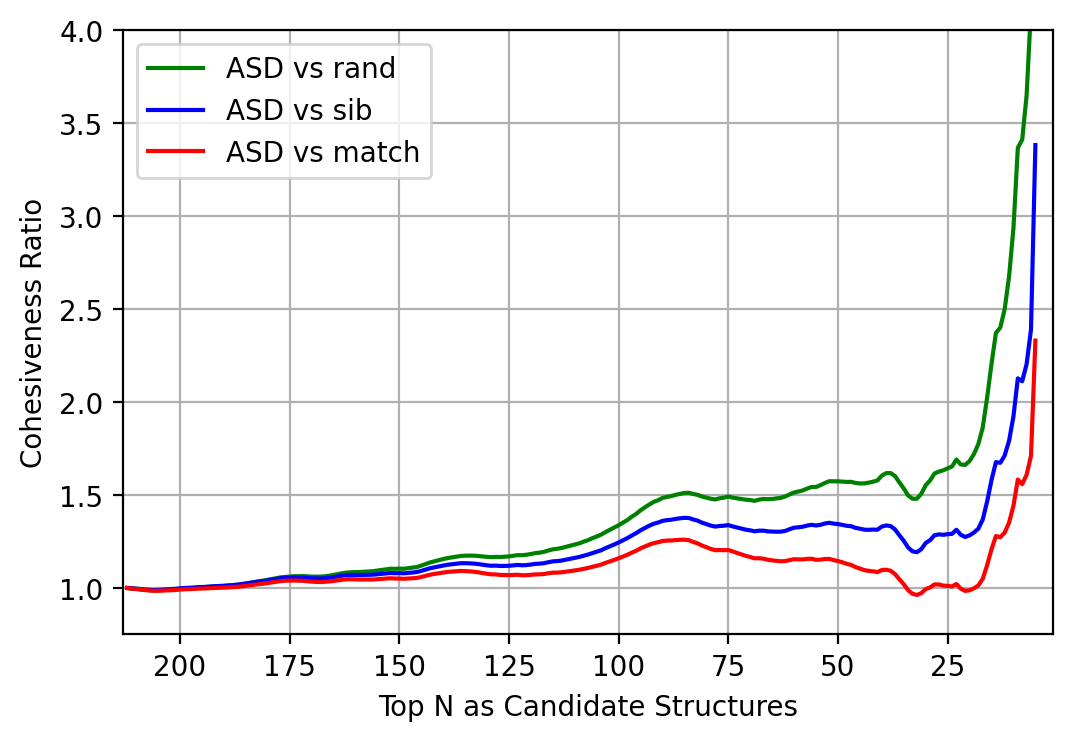

In [13]:
fig, ax = plt.subplots(dpi=200)
ax.plot(list(range(1,213,1)), asd_vs_rand, label="ASD vs rand", color="green", linestyle="-")
ax.plot(list(range(1,213,1)), asd_vs_sib, label="ASD vs sib", color="blue", linestyle="-")
ax.plot(list(range(1,213,1)), asd_vs_match, label="ASD vs match", color="red", linestyle="-")
ax.set_xlim(213, 1)  # decreasing time
ax.legend()
#plt.title("Ratio of ASD/Exp Cohesiveness")
plt.grid(True)
plt.xlabel("Top N as Candidate Structures")
plt.ylabel("Cohesiveness Ratio")
plt.ylim((0.75,4))
plt.savefig("figs/topN_cohesivness_ratio.pdf")

In [16]:
for i, v in enumerate(asd_vs_sib):
    print(i,v)

0 nan
1 nan
2 nan
3 nan
4 3.7526929519288825
5 2.598046414966046
6 2.386900259816001
7 2.307466298523813
8 2.332292414775262
9 2.1217478193782138
10 1.9885102077558618
11 1.848704413059357
12 1.7600209935001259
13 1.7242225110506526
14 1.6099442551674052
15 1.4906174495992912
16 1.3937533868772274
17 1.336193868972804
18 1.3063734518261414
19 1.277175401060772
20 1.2521153044185498
21 1.2459331383296817
22 1.2621272243313373
23 1.2417731598506216
24 1.2374785348111346
25 1.2304407967576325
26 1.228486216058067
27 1.224844735371468
28 1.1964545994061748
29 1.1762850293934723
30 1.1490354548545094
31 1.136527475865403
32 1.141410956653554
33 1.164921738196366
34 1.2065894087254494
35 1.2427891423857484
36 1.2753502631224343
37 1.2998814538404468
38 1.315270064055418
39 1.315870297178761
40 1.3013784903856298
41 1.3039996148772752
42 1.3034472897831562
43 1.303832330958917
44 1.3056821868288158
45 1.3040848600397024
46 1.308599403715906
47 1.3101133979213642
48 1.3165718087213663
49 1.323

/Users/jiayao/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jiayao/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jiayao/Work/ASD_Circuits/src/ASD_Circuits.py:1759: RuntimeWarning: invalid value encountered in true_divide
  unweight = movingAVG(np.array(ASD_Cohe[1:213])/np.array(Cont_Cohe[1:213]))


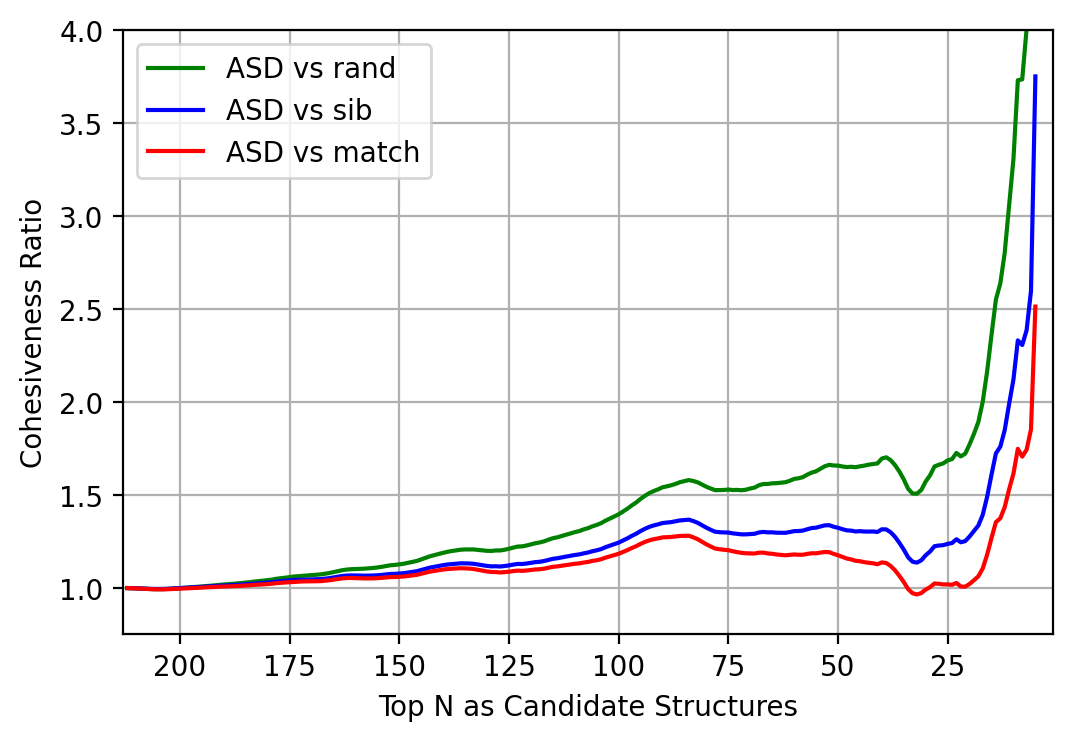

In [14]:
N_sim = 1000
weighted, directed = True, True
asd_vs_rand = TopNAndCohesiveness(ASD_Bias, g, weighted, directed, EdgeWeightsDict, "rand", N_sim)
asd_vs_sib = TopNAndCohesiveness(ASD_Bias, g, weighted, directed, EdgeWeightsDict, "sib", N_sim)
asd_vs_match = TopNAndCohesiveness(ASD_Bias, g, weighted, directed, EdgeWeightsDict, "match", N_sim)

fig, ax = plt.subplots(dpi=200)
ax.plot(list(range(1,213,1)), asd_vs_rand, label="ASD vs rand", color="green", linestyle="-")
ax.plot(list(range(1,213,1)), asd_vs_sib, label="ASD vs sib", color="blue", linestyle="-")
ax.plot(list(range(1,213,1)), asd_vs_match, label="ASD vs match", color="red", linestyle="-")
ax.set_xlim(213, 1)  # decreasing time
ax.legend()
plt.grid(True)
plt.xlabel("Top N as Candidate Structures")
plt.ylabel("Cohesiveness Ratio")
plt.ylim((0.75,4))
plt.savefig("figs/topN_cohesivness_ratio.wd.pdf")

In [19]:
adj_mat = pd.read_csv(
    "../dat/allen-mouse-conn/norm_density-max_ipsi_contra-pval_0.05-deg_min_1-by_weight_pvalue.csv",
    index_col="ROW")
str2reg = STR2Region()
ALL_STRs = adj_mat.index.values
adj_mat_local = []
adj_mat_distal = []
for str_i in ALL_STRs:
    tmp_local = []
    tmp_distal = []
    for str_j in ALL_STRs:
        weight = adj_mat.loc[str_i, str_j]
        if weight == 0:
            tmp_local.append(0)
            tmp_distal.append(0)
        else:
            rg_i = str2reg[str_i]
            rg_j = str2reg[str_j]
            if rg_i == rg_j:
                tmp_local.append(weight)
                tmp_distal.append(0)
            else:
                tmp_local.append(0)
                tmp_distal.append(weight)
    adj_mat_local.append(tmp_local)
    adj_mat_distal.append(tmp_distal)
adj_mat_local = pd.DataFrame(data=adj_mat_local, index=ALL_STRs, columns=ALL_STRs)
adj_mat_distal = pd.DataFrame(data=adj_mat_distal, index=ALL_STRs, columns=ALL_STRs)

In [20]:
type("xxx") == str
g_local = LoadConnectome2(ConnFil=adj_mat_local)
g_distal = LoadConnectome2(ConnFil=adj_mat_distal)
EdgeWeightsDict_local = EdgeDict(g_local, keyon="label")
EdgeWeightsDict_distal = EdgeDict(g_distal, keyon="label")

In [44]:
ASD_Cohe, Cont_Cohe = [], []
weighted, directed = False, False
for topN in range(10, 50, 1):
    CandidateNodes = ASD_Bias.head(topN).index.values
    asd = ScoreSTRSet(g_distal, CandidateNodes, EdgeWeightsDict, Weighted=weighted, Direction=directed)
    asd = np.mean(asd)
    cont_cohe = ContTopNvsCohe(ASD_Bias, topN, weighted, directed, g_distal, EdgeWeightsDict, "sib", N_sim)
    ASD_Cohe.append(asd)
    Cont_Cohe.append(cont_cohe)

Text(0, 0.5, 'Cohesiveness Ratio')

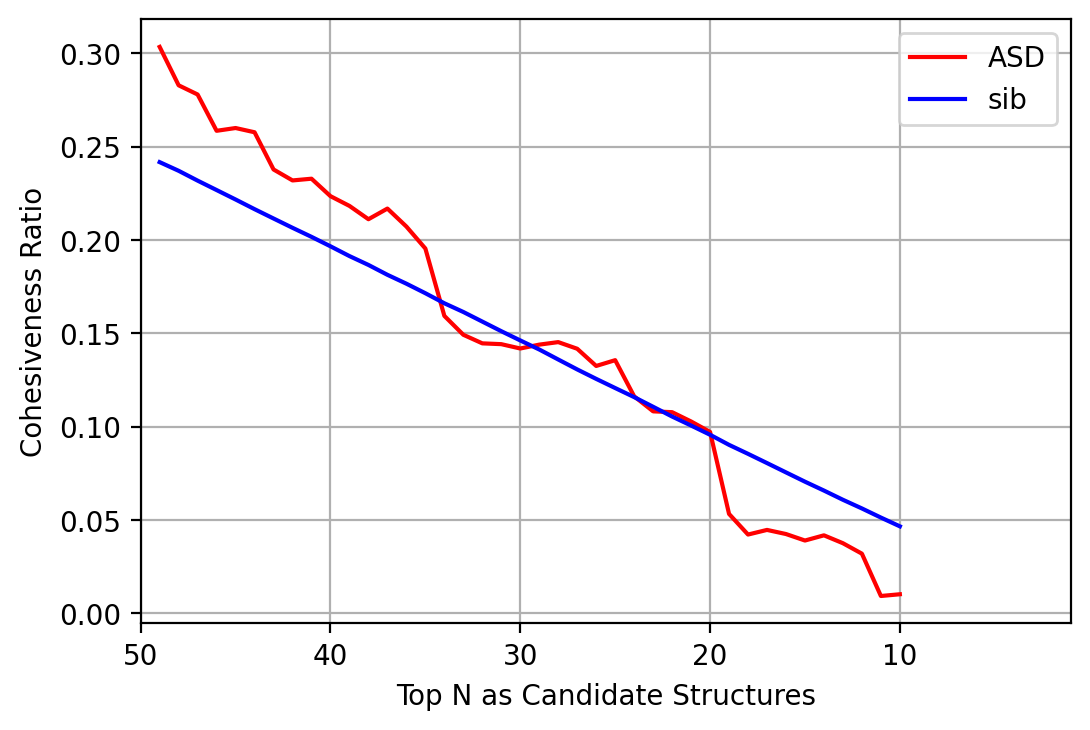

In [49]:
fig, ax = plt.subplots(dpi=200)
ax.plot(list(range(10,50,1)), ASD_Cohe, label="ASD", color="red", linestyle="-")
ax.plot(list(range(10,50,1)), Cont_Cohe, label="sib", color="blue", linestyle="-")
ax.set_xlim(50, 1)  # decreasing time
ax.legend()
#plt.title("Ratio of ASD/Exp Cohesiveness")
plt.grid(True)
plt.xlabel("Top N as Candidate Structures")
plt.ylabel("Cohesiveness Ratio")

In [31]:
N_sim = 1000
weighted, directed = False, False
asd_vs_rand = TopNAndCohesiveness(ASD_Bias, g_distal, weighted, directed, EdgeWeightsDict_distal, "rand", N_sim)
asd_vs_sib = TopNAndCohesiveness(ASD_Bias, g_distal, weighted, directed, EdgeWeightsDict_distal, "sib", N_sim)
asd_vs_match = TopNAndCohesiveness(ASD_Bias, g_distal, weighted, directed, EdgeWeightsDict_distal, "match", N_sim)

/Users/jiayao/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jiayao/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jiayao/Work/ASD_Circuits/src/ASD_Circuits.py:1760: RuntimeWarning: invalid value encountered in true_divide
  return unweight


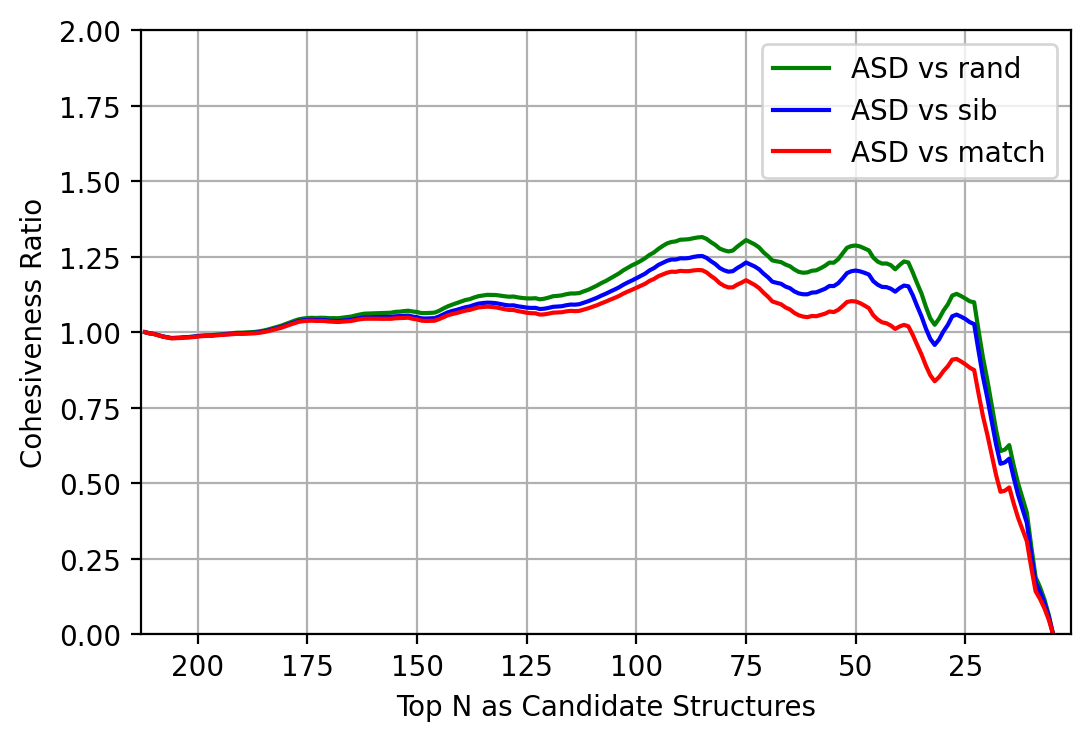

In [128]:
fig, ax = plt.subplots(dpi=200)
ax.plot(list(range(1,213,1)), asd_vs_rand, label="ASD vs rand", color="green", linestyle="-")
ax.plot(list(range(1,213,1)), asd_vs_sib, label="ASD vs sib", color="blue", linestyle="-")
ax.plot(list(range(1,213,1)), asd_vs_match, label="ASD vs match", color="red", linestyle="-")
ax.set_xlim(213, 1)  # decreasing time
ax.legend()
#plt.title("Ratio of ASD/Exp Cohesiveness")
plt.grid(True)
plt.xlabel("Top N as Candidate Structures")
plt.ylabel("Cohesiveness Ratio")
plt.ylim((0,2))
plt.savefig("figs/topN_cohesivness_ratio.distal.pdf")

In [129]:
N_sim = 1000
weighted, directed = True, False
asd_vs_rand_distal_w = TopNAndCohesiveness(ASD_Bias, g_distal, weighted, directed, EdgeWeightsDict_distal, "rand", N_sim)
asd_vs_sib_distal_w = TopNAndCohesiveness(ASD_Bias, g_distal, weighted, directed, EdgeWeightsDict_distal, "sib", N_sim)
asd_vs_match_distal_w = TopNAndCohesiveness(ASD_Bias, g_distal, weighted, directed, EdgeWeightsDict_distal, "match", N_sim)

/Users/jiayao/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jiayao/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jiayao/Work/ASD_Circuits/src/ASD_Circuits.py:1761: RuntimeWarning: invalid value encountered in true_divide
  unweight = movingAVG(np.array(ASD_Cohe[1:213])/np.array(Cont_Cohe[1:213]))


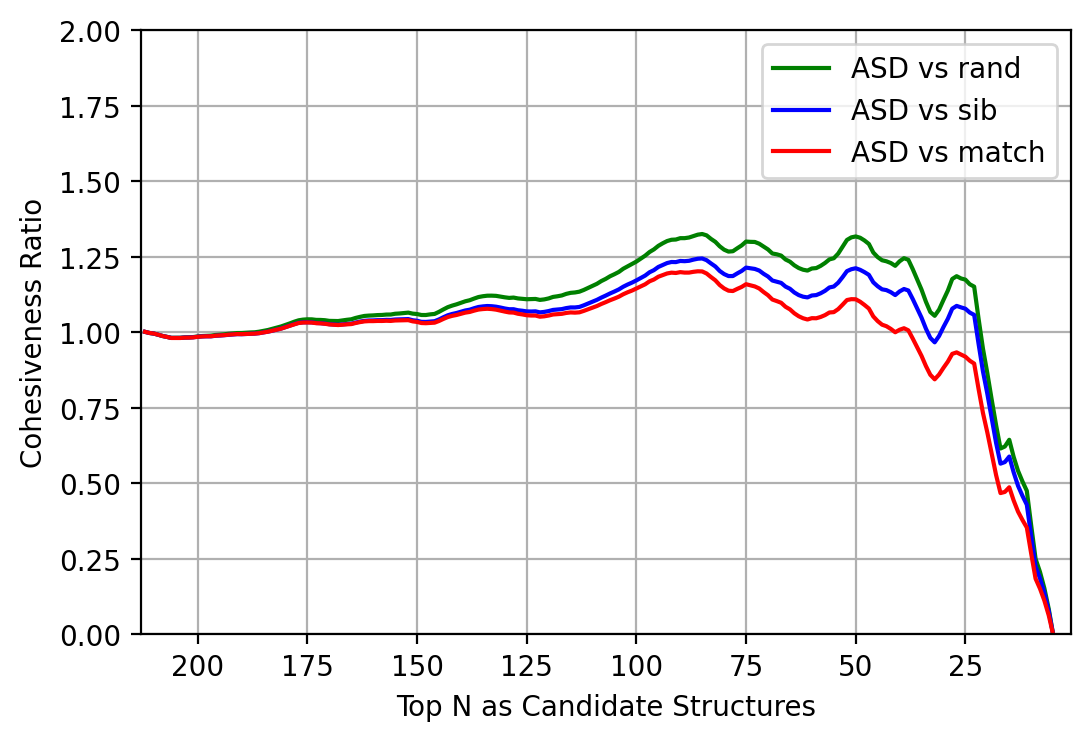

In [130]:
fig, ax = plt.subplots(dpi=200)
ax.plot(list(range(1,213,1)), asd_vs_rand_distal_w, label="ASD vs rand", color="green", linestyle="-")
ax.plot(list(range(1,213,1)), asd_vs_sib_distal_w, label="ASD vs sib", color="blue", linestyle="-")
ax.plot(list(range(1,213,1)), asd_vs_match_distal_w, label="ASD vs match", color="red", linestyle="-")
ax.set_xlim(213, 1)  # decreasing time
ax.legend()
#plt.title("Ratio of ASD/Exp Cohesiveness")
plt.grid(True)
plt.xlabel("Top N as Candidate Structures")
plt.ylabel("Cohesiveness Ratio")
plt.ylim((0,2))
plt.savefig("figs/topN_cohesivness_ratio.distal.w.pdf")

In [23]:
N_sim = 1000
weighted, directed = False, False
asd_vs_rand = TopNAndCohesiveness(ASD_Bias, g_local, weighted, directed, EdgeWeightsDict_local, "rand", N_sim)
asd_vs_sib = TopNAndCohesiveness(ASD_Bias, g_local, weighted, directed, EdgeWeightsDict_local, "sib", N_sim)
asd_vs_match = TopNAndCohesiveness(ASD_Bias, g_local, weighted, directed, EdgeWeightsDict_local, "match", N_sim)

/Users/jiayao/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jiayao/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jiayao/Work/ASD_Circuits/src/ASD_Circuits.py:1760: RuntimeWarning: invalid value encountered in true_divide
  return unweight


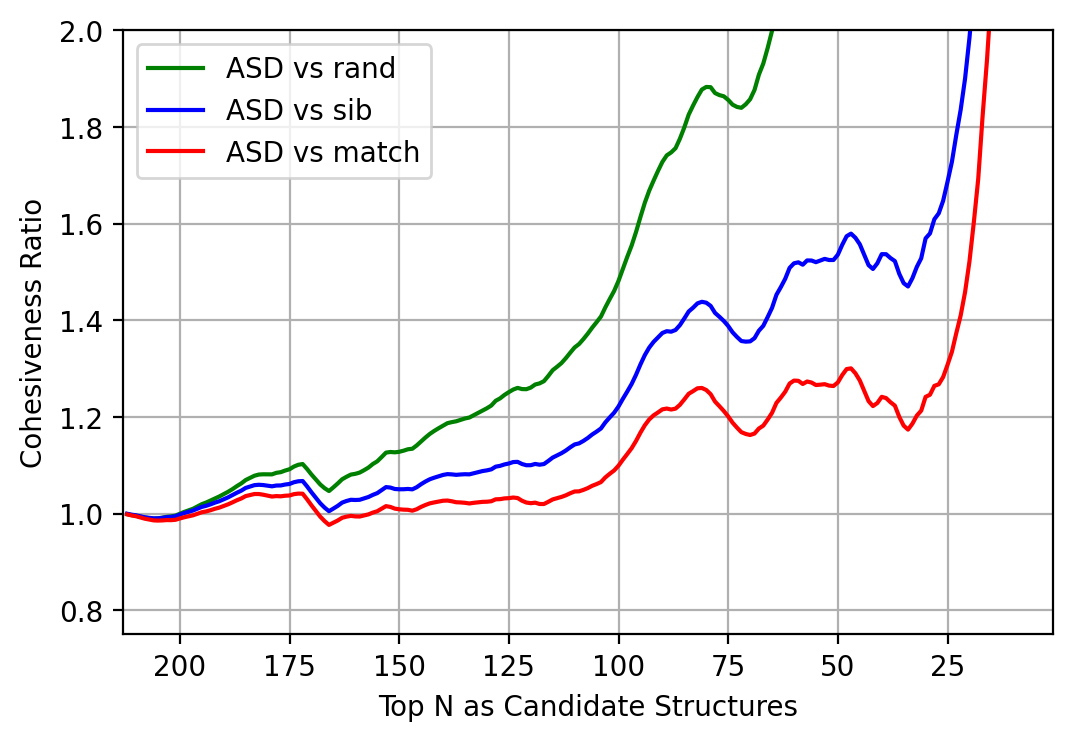

In [30]:
fig, ax = plt.subplots(dpi=200)
ax.plot(list(range(1,213,1)), asd_vs_rand, label="ASD vs rand", color="green", linestyle="-")
ax.plot(list(range(1,213,1)), asd_vs_sib, label="ASD vs sib", color="blue", linestyle="-")
ax.plot(list(range(1,213,1)), asd_vs_match, label="ASD vs match", color="red", linestyle="-")
ax.set_xlim(213, 1)  # decreasing time
ax.legend()
#plt.title("Ratio of ASD/Exp Cohesiveness")
plt.grid(True)
plt.xlabel("Top N as Candidate Structures")
plt.ylabel("Cohesiveness Ratio")
plt.ylim((0.75,2))
plt.savefig("figs/topN_cohesivness_ratio.local.pdf")

In [239]:
Local_adjmat_cartesian = pd.read_csv("../dat/allen-mouse-conn/adj_mat_cartesian_local.csv", index_col=0)
Global_adjmat_cartesian = pd.read_csv("../dat/allen-mouse-conn/adj_mat_cartesian_distal.csv", index_col=0)
g_local_cartesian = LoadConnectome2(Local_adjmat_cartesian)
g_global_cartesian = LoadConnectome2(Global_adjmat_cartesian)

In [240]:
N_sim = 1000
weighted, directed = False, False
asd_vs_rand_distal_w = TopNAndCohesiveness(ASD_Bias, g_global_cartesian, weighted, directed, EdgeWeightsDict_distal, "rand", N_sim)
asd_vs_sib_distal_w = TopNAndCohesiveness(ASD_Bias, g_global_cartesian, weighted, directed, EdgeWeightsDict_distal, "sib", N_sim)
asd_vs_match_distal_w = TopNAndCohesiveness(ASD_Bias, g_global_cartesian, weighted, directed, EdgeWeightsDict_distal, "match", N_sim)

/Users/jiayao/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jiayao/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jiayao/Work/ASD_Circuits/src/ASD_Circuits.py:1763: RuntimeWarning: invalid value encountered in true_divide
  unweight = movingAVG(np.array(ASD_Cohe[1:213])/np.array(Cont_Cohe[1:213]))


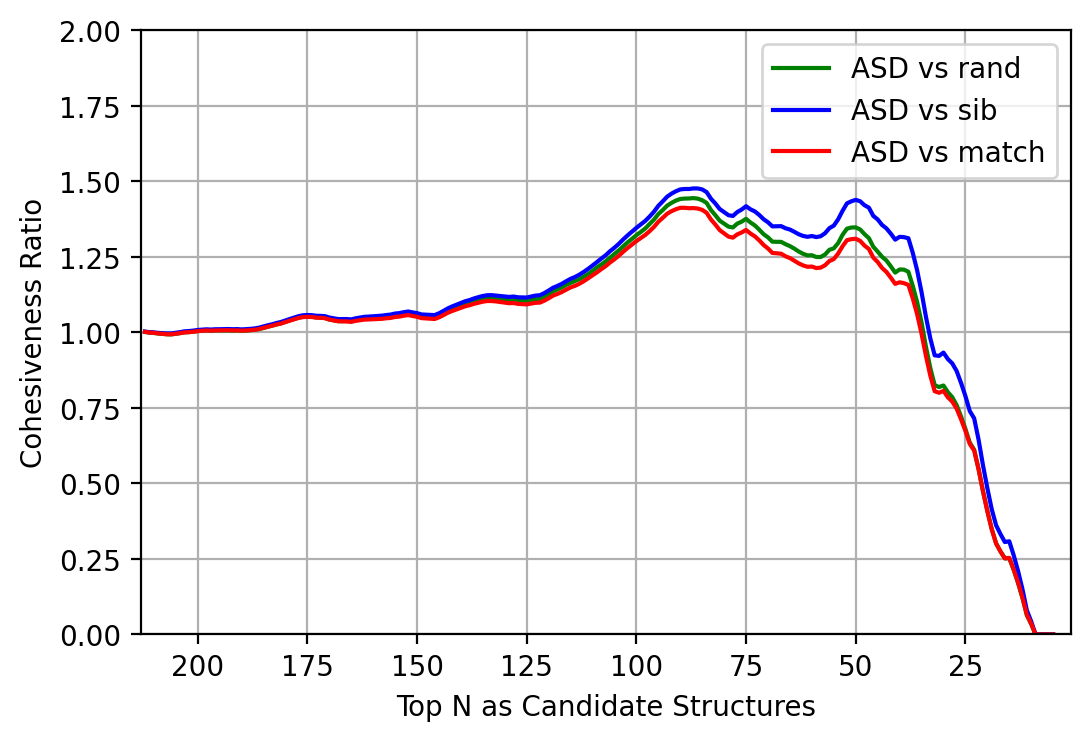

In [241]:
fig, ax = plt.subplots(dpi=200)
ax.plot(list(range(1,213,1)), asd_vs_rand_distal_w, label="ASD vs rand", color="green", linestyle="-")
ax.plot(list(range(1,213,1)), asd_vs_sib_distal_w, label="ASD vs sib", color="blue", linestyle="-")
ax.plot(list(range(1,213,1)), asd_vs_match_distal_w, label="ASD vs match", color="red", linestyle="-")
ax.set_xlim(213, 1)  # decreasing time
ax.legend()
#plt.title("Ratio of ASD/Exp Cohesiveness")
plt.grid(True)
plt.xlabel("Top N as Candidate Structures")
plt.ylabel("Cohesiveness Ratio")
plt.ylim((0,2))
plt.savefig("figs/topN_cohesivness_ratio.cartesian_distal.pdf")

In [242]:
N_sim = 1000
weighted, directed = False, False
asd_vs_rand_local_b = TopNAndCohesiveness(ASD_Bias, g_local_cartesian, weighted, directed, EdgeWeightsDict_distal, "rand", N_sim)
asd_vs_sib_local_b = TopNAndCohesiveness(ASD_Bias, g_local_cartesian, weighted, directed, EdgeWeightsDict_distal, "sib", N_sim)
asd_vs_match_local_b = TopNAndCohesiveness(ASD_Bias, g_local_cartesian, weighted, directed, EdgeWeightsDict_distal, "match", N_sim)


/Users/jiayao/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jiayao/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jiayao/Work/ASD_Circuits/src/ASD_Circuits.py:1763: RuntimeWarning: invalid value encountered in true_divide
  unweight = movingAVG(np.array(ASD_Cohe[1:213])/np.array(Cont_Cohe[1:213]))


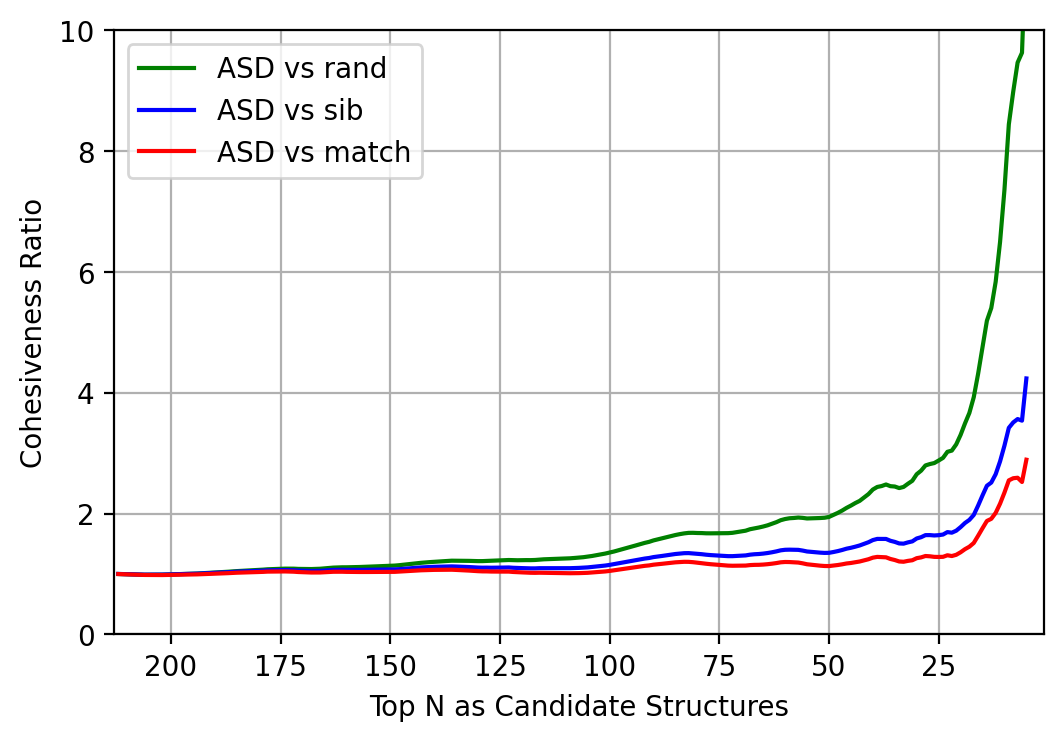

In [244]:
fig, ax = plt.subplots(dpi=200)
ax.plot(list(range(1,213,1)), asd_vs_rand_local_b, label="ASD vs rand", color="green", linestyle="-")
ax.plot(list(range(1,213,1)), asd_vs_sib_local_b, label="ASD vs sib", color="blue", linestyle="-")
ax.plot(list(range(1,213,1)), asd_vs_match_local_b, label="ASD vs match", color="red", linestyle="-")
ax.set_xlim(213, 1)  # decreasing time
ax.legend()
#plt.title("Ratio of ASD/Exp Cohesiveness")
plt.grid(True)
plt.xlabel("Top N as Candidate Structures")
plt.ylabel("Cohesiveness Ratio")
plt.ylim((0,10))
plt.savefig("figs/topN_cohesivness_ratio.cartesian_local.pdf")

# Long dist in top ranked STRS

In [50]:
str_reg_df = pd.read_csv("dat/structure2region.map", delimiter="\t")
Regions = set(str_reg_df["REG"].values)
Reg2STRs = {}
for REG in Regions:
    Reg2STRs[REG] = str_reg_df[str_reg_df["REG"]==REG]["STR"].values

In [95]:
adj_mat = pd.read_csv(ConnFil, index_col=0)
adj_mat_c2c, adj_mat_other = MaskCortex2Cortex(adj_mat, Reg2STRs["Isocortex"])
adj_mat_h2h, adj_mat_other_h2h = MaskCortex2Cortex(adj_mat, Reg2STRs["Hippocampal_region"])
adj_mat_local, adj_mat_distal = LocalDistal_Region()

In [97]:
g_local = LoadConnectome2(ConnFil=adj_mat_local)
g_distal = LoadConnectome2(ConnFil=adj_mat_distal)
EdgeWeightsDict_local = EdgeDict(g_local, keyon="label")
EdgeWeightsDict_distal = EdgeDict(g_distal, keyon="label")

g_c2c = LoadConnectome2(ConnFil=adj_mat_c2c)
g_other = LoadConnectome2(ConnFil=adj_mat_other)
EdgeWeightsDict_c2c = EdgeDict(g_c2c, keyon="label")
EdgeWeightsDict_other = EdgeDict(g_other, keyon="label")

g_h2h = LoadConnectome2(ConnFil=adj_mat_h2h)
g_other_h2h = LoadConnectome2(ConnFil=adj_mat_other_h2h)
EdgeWeightsDict_c2c = EdgeDict(g_h2h, keyon="label")
EdgeWeightsDict_other = EdgeDict(g_other_h2h, keyon="label")

In [198]:
topN = 50
weighted = True; directed=True
CandidateNodes = ASD_Bias.head(topN).index.values
asd = ScoreSTRSet(g, CandidateNodes, EdgeWeightsDict, Weighted=weighted, Direction=directed)
cont_cohe = ContTopNvsCohe(ASD_Bias, topN, weighted, directed, g, EdgeWeightsDict, "sib", N_sim)

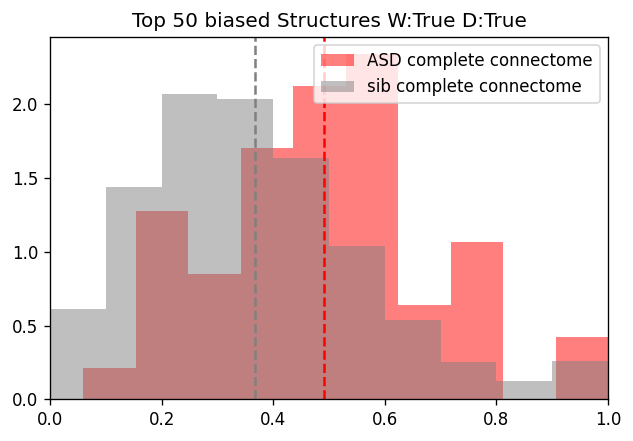

In [199]:
plt.figure(dpi=120)
#sns.distplot(a=asd, hist=False, color="red", label="ASD complete connectome", kde={"bw":0.00005})
plt.hist(asd, color="red", density=1, label="ASD complete connectome", alpha=0.5)
plt.axvline(x=np.mean(asd), c="red", linestyle="--")
#sns.distplot(a=cont_cohe, hist=False, color="grey", label="sib complete connectome", kde={"bw":0.00005})
plt.hist(cont_cohe.flatten(), color="grey", density=1, label="sib complete connectome", alpha=0.5)
plt.axvline(x=np.mean(cont_cohe), c="grey", linestyle="--")
plt.xlim((0,1))
plt.legend()
plt.title("Top 50 biased Structures W:{} D:{}".format(weighted, directed))
plt.show()

In [174]:
cont_cohe = np.array(cont_cohe)

In [175]:
GetPermutationP(np.mean(cont_cohe, axis=1), np.mean(asd))

0.049950049950049924

In [176]:
np.mean(asd)

0.36764212935926754

In [121]:
#topN = 15
CandidateNodes = ASD_Bias.head(topN).index.values
asd = ScoreSTRSet(g_other, CandidateNodes, EdgeWeightsDict, Weighted=weighted, Direction=directed)
cont_cohe = ContTopNvsCohe(ASD_Bias, topN, weighted, directed, g_other, EdgeWeightsDict, "sib", N_sim)

(0.0, 0.8)

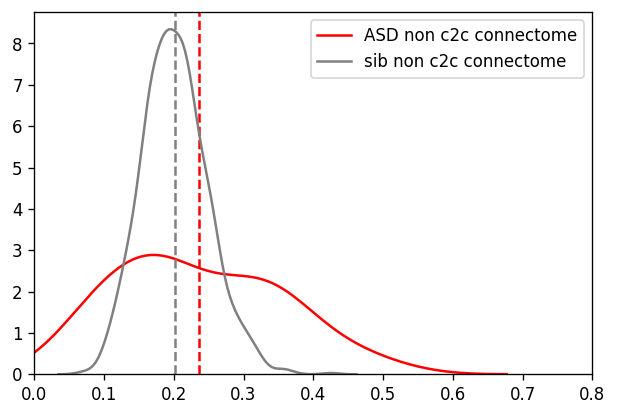

In [122]:
plt.figure(dpi=120)
sns.distplot(a=asd, hist=False, color="red", label="ASD non c2c connectome", kde={"bw":0.00005})
plt.axvline(x=np.mean(asd), c="red", linestyle="--")
sns.distplot(a=cont_cohe, hist=False, color="grey", label="sib non c2c connectome", kde={"bw":0.00005})
plt.axvline(x=np.mean(cont_cohe), c="grey", linestyle="--")
plt.xlim((0,0.8))

In [200]:
#topN = 15
CandidateNodes = ASD_Bias.head(topN).index.values
asd = ScoreSTRSet(g_distal, CandidateNodes, EdgeWeightsDict, Weighted=weighted, Direction=directed)
cont_cohe = ContTopNvsCohe(ASD_Bias, topN, weighted, directed, g_distal, EdgeWeightsDict, "sib", N_sim)

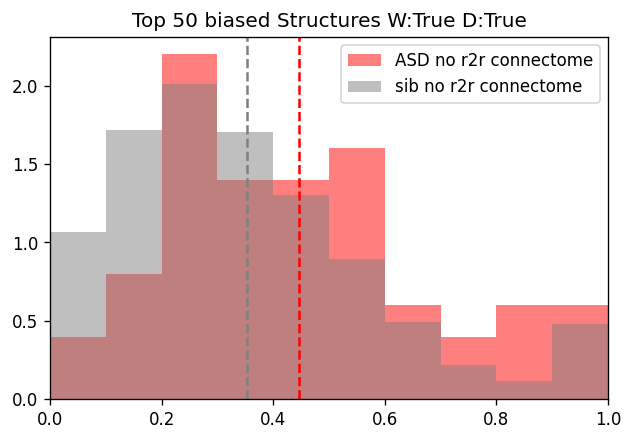

In [201]:
plt.figure(dpi=120)
#sns.distplot(a=asd, hist=False, color="red", label="ASD complete connectome", kde={"bw":0.00005})
plt.hist(asd, color="red", density=1, label="ASD no r2r connectome", alpha=0.5)
plt.axvline(x=np.mean(asd), c="red", linestyle="--")
#sns.distplot(a=cont_cohe, hist=False, color="grey", label="sib complete connectome", kde={"bw":0.00005})
plt.hist(cont_cohe.flatten(), color="grey", density=1, label="sib no r2r connectome", alpha=0.5)
plt.axvline(x=np.mean(cont_cohe), c="grey", linestyle="--")
plt.xlim((0,1))
plt.legend()
plt.title("Top 50 biased Structures W:{} D:{}".format(weighted, directed))
plt.show()

In [160]:
mannwhitneyu(asd, cont_cohe.flatten())

MannwhitneyuResult(statistic=766090.5, pvalue=1.0743129963005266e-06)

In [155]:
#topN = 15
CandidateNodes = ASD_Bias.head(topN).index.values
asd = ScoreSTRSet(g_other_h2h, CandidateNodes, EdgeWeightsDict, Weighted=weighted, Direction=directed)
cont_cohe = ContTopNvsCohe(ASD_Bias, topN, weighted, directed, g_other_h2h, EdgeWeightsDict, "sib", N_sim)

(0.0, 0.8)

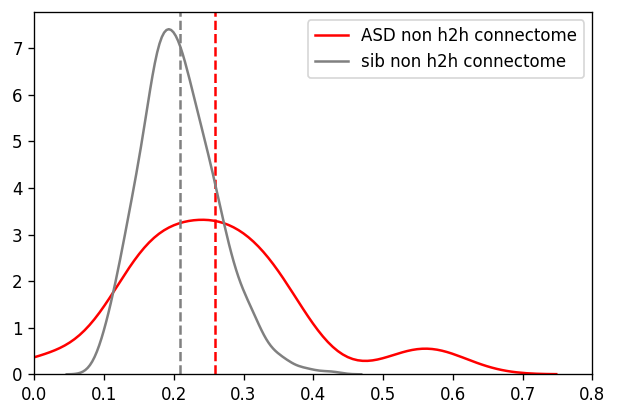

In [126]:
plt.figure(dpi=120)
sns.distplot(a=asd, hist=False, color="red", label="ASD non h2h connectome", kde={"bw":0.00005})
plt.axvline(x=np.mean(asd), c="red", linestyle="--")
sns.distplot(a=cont_cohe, hist=False, color="grey", label="sib non h2h connectome", kde={"bw":0.00005})
plt.axvline(x=np.mean(cont_cohe), c="grey", linestyle="--")
plt.xlim((0,0.8))

In [231]:
def GetWeightDist(adj_mat, candidate_STRs):
    sub_mat = adj_mat.loc[candidate_STRs, candidate_STRs]
    weightes = [x for x in sub_mat.values.flatten() if x > 0]
    return weightes

In [232]:
xx = GetWeightDist(adj_mat, ASD_Bias.head(topN).index.values)

In [233]:
sib_weights = []
N_weights = []
for i in range(1000):
    BiasDF_cont = pd.read_csv("dat/cont.sib.bias/ASD.sib.Spec.bias.{}.csv".format(i), index_col="STR")
    CandidateNodes = BiasDF_cont.head(topN).index.values
    sib_w = GetWeightDist(adj_mat, CandidateNodes)
    sib_weights.extend(sib_w)
    N_weights.append(len(sib_w))

3.383193805877286 3.3169308184976094
MannwhitneyuResult(statistic=39843353.5, pvalue=0.07035081741513154)
339 246.457


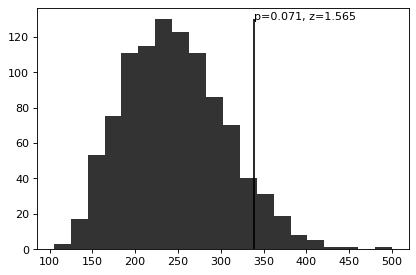

In [234]:
print(np.mean(xx), np.mean(sib_weights))
print(mannwhitneyu(xx, sib_weights))
print(len(xx), np.mean(N_weights))
PlotPermutationP(N_weights, len(xx))

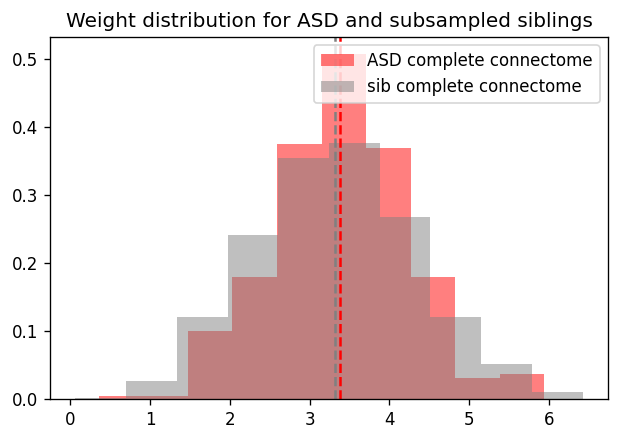

In [235]:
plt.figure(dpi=120)
plt.hist(xx, color="red", density=1, label="ASD complete connectome", alpha=0.5)
plt.axvline(x=np.mean(xx), c="red", linestyle="--")
plt.hist(sib_weights, color="grey", density=1, label="sib complete connectome", alpha=0.5)
plt.axvline(x=np.mean(sib_weights), c="grey", linestyle="--")
plt.legend()
plt.title("Weight distribution for ASD and subsampled siblings")
plt.show()

In [236]:
xx = GetWeightDist(adj_mat_distal, ASD_Bias.head(topN).index.values)
sib_weights = []
N_weights = []
for i in range(1000):
    BiasDF_cont = pd.read_csv("dat/cont.sib.bias/ASD.sib.Spec.bias.{}.csv".format(i), index_col="STR")
    CandidateNodes = BiasDF_cont.head(topN).index.values
    sib_w = GetWeightDist(adj_mat_distal, CandidateNodes)
    sib_weights.extend(sib_w)
    N_weights.append(len(sib_w))

3.369087669365748 3.2828300764504688
MannwhitneyuResult(statistic=16440466.5, pvalue=0.05435448232743711)
209 168.1


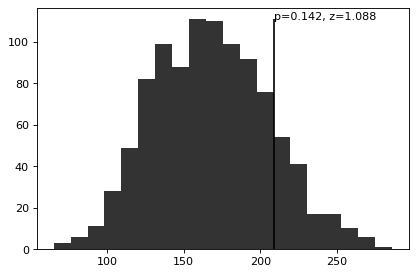

In [237]:
print(np.mean(xx), np.mean(sib_weights))
print(mannwhitneyu(xx, sib_weights))
print(len(xx), np.mean(N_weights))
PlotPermutationP(N_weights, len(xx))

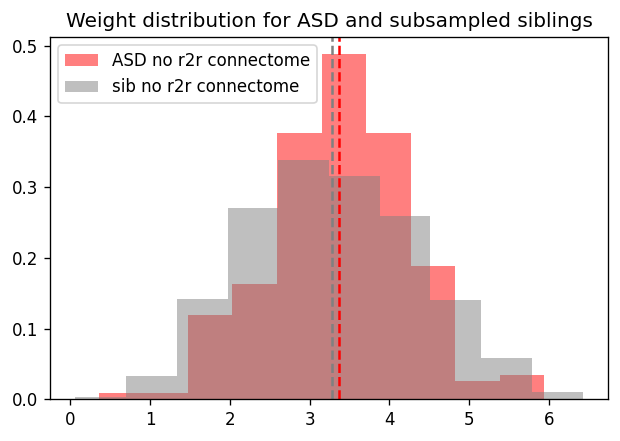

In [238]:
plt.figure(dpi=120)
plt.hist(xx, color="red", density=1, label="ASD no r2r connectome", alpha=0.5)
plt.axvline(x=np.mean(xx), c="red", linestyle="--")
plt.hist(sib_weights, color="grey", density=1, label="sib no r2r connectome", alpha=0.5)
plt.axvline(x=np.mean(sib_weights), c="grey", linestyle="--")
plt.legend()
plt.title("Weight distribution for ASD and subsampled siblings")
plt.show()